## Лабораторная работа №1 по курсу "Методы оптимизации".

Студент: Гольцов И. С.

Группа: РК6-64.

##### Импорт и общие параметры.

In [201]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

figsize_standart = (6, 4)
figsize_more = (16, 10)
dpi_standart = 200

##### Вспомогательная функция для считывания заданной выборки из .csv файла:

In [202]:
def csv_reader(path_to_csv):
    reader = csv.reader(path_to_csv)
    nodes = []
    for node in reader:
        node = " ".join(node).split(" ")
        nodes.append((float(node[0]), float(node[1])))
    return nodes

##### Считывание заданной выборки из файла:

In [203]:
path_to_file = "lab1.csv"

with open(path_to_file, "r") as file:
    nodes = csv_reader(file)

nodes = sorted(nodes, key=lambda node: node[0])

X_vec = np.array([node[0] for node in nodes])
Y_vec = np.array([node[1] for node in nodes])

##### Кусочно-линейная интерполяция:

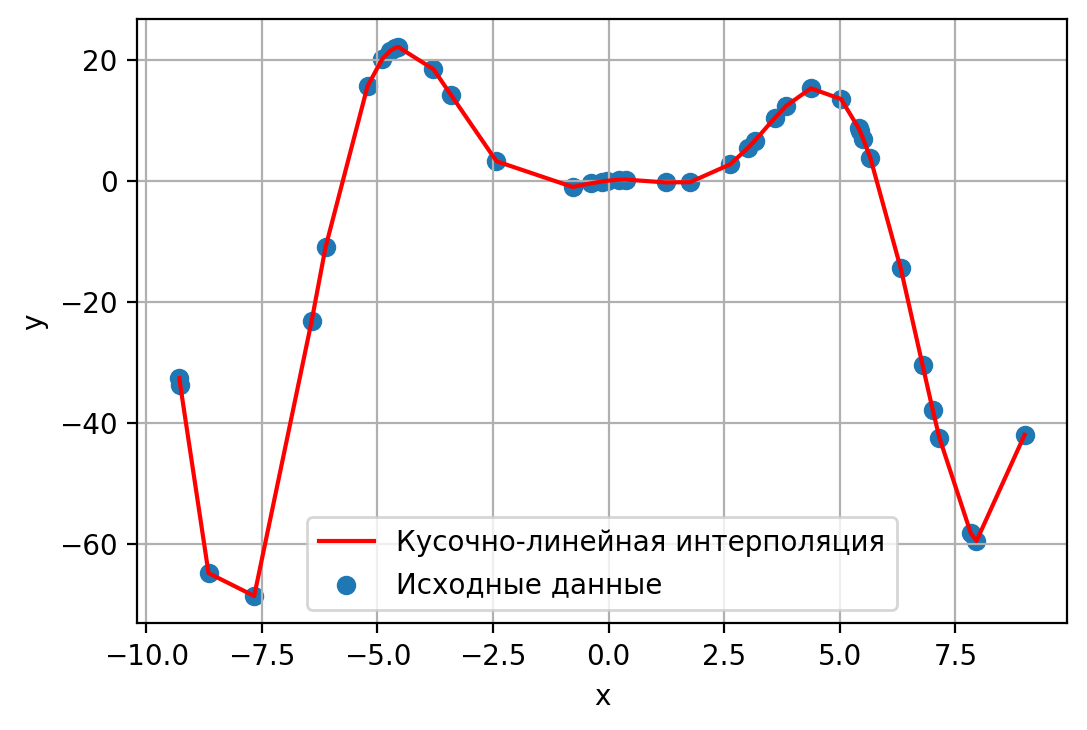

In [204]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize_standart, dpi=dpi_standart)

axes.scatter(X_vec, Y_vec, label='Исходные данные')
axes.plot(X_vec, Y_vec, color='red', label='Кусочно-линейная интерполяция')

plt.xlabel('x')
plt.ylabel('y')

axes.legend(loc='best')
axes.grid()

plt.show()

###### Проанализировав результаты кусочно-линейной интерполяции, возьмем в качестве функции, аппроксимируещей заданную 

###### выборку, функцию `f(x) = (-ax^2 + bx) * cos(kx)`.

In [205]:
def f(x, a, b, k):
    return (-a * (x**2) + b * x) * np.cos(k*x)

##### Получение оптимального решения:

In [206]:
solution, _ = curve_fit(f, X_vec, Y_vec)

a = solution[0]
b = solution[1]
k = solution[2]

print("Оптимальное решение:")
print("a = {}, b = {}, k = {}".format(a, b, k))

Оптимальное решение:
a = 1.0600000000000007, b = 0.8500000000000008, k = 0.81


###### Полученная оптимальная аппроксимирующая функция: `f(x) = (-1.06x^2 + 0.85x) * cos(0.81x)`.

##### Построение графика оптимальной аппроксимириующей функции:

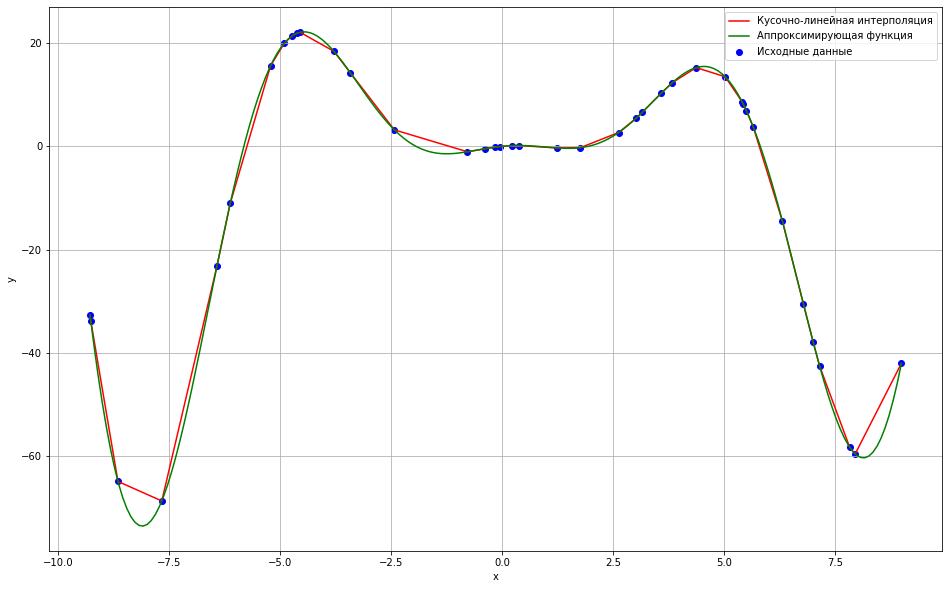

In [207]:
plot_nodes_count = 200
plot_interval_start = np.max(X_vec)
plot_interval_end = np.min(X_vec)

X_opt = np.linspace(plot_interval_start, plot_interval_end, plot_nodes_count)
Y_opt = np.array([f(i, a, b, k) for i in X_opt])

_, axes = plt.subplots(1, 1, figsize=figsize_more)

axes.scatter(X_vec, Y_vec, color='blue', label='Исходные данные')
axes.plot(X_vec, Y_vec, color='red', label='Кусочно-линейная интерполяция')
axes.plot(X_opt, Y_opt, color='green', label='Аппроксимирующая функция')

plt.xlabel('x')
plt.ylabel('y')

axes.legend(loc='best')
axes.grid()

plt.show()

###### Поиск максимального отклонения и среднеквадратичного отклонения.

In [208]:
f_vec = np.vectorize(f, excluded=['a', 'b', 'k'])

max_deviation = np.max(np.abs(Y_vec - f_vec(X_vec, a=a, b=b, k=k)))
standart_deviation = np.sqrt(np.sum(np.power(Y_vec - f_vec(X_vec, a=a, b=b, k=k), 2)) / len(X_vec))

print("Максимальное отклонение: {}".format(max_deviation))
print("Среднеквадратичное отклоение: {}".format(standart_deviation))

Максимальное отклонение: 4.263256414560601e-14
Среднеквадратичное отклоение: 1.763381313948946e-14
